#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [23]:
# Read CSV
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [24]:
dupe = df.duplicated()
print(dupe)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


Periksa apakah ada missing values

In [25]:
missing_values = df.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


Periksa outlier dengan boxplot untuk setiap kolom feature

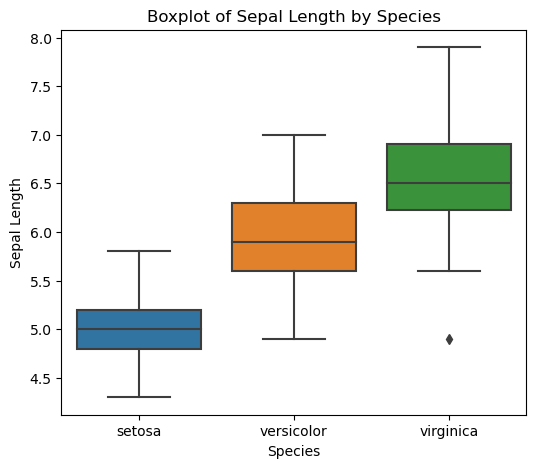

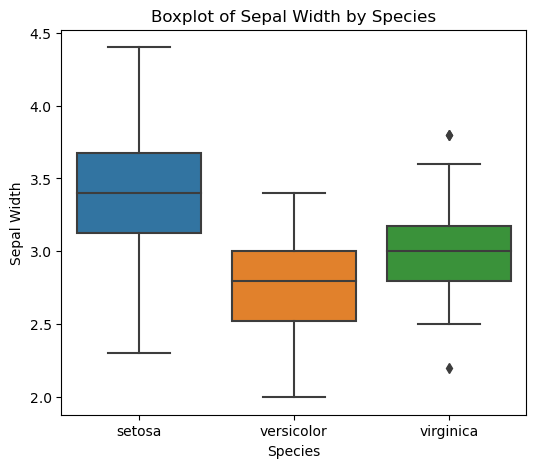

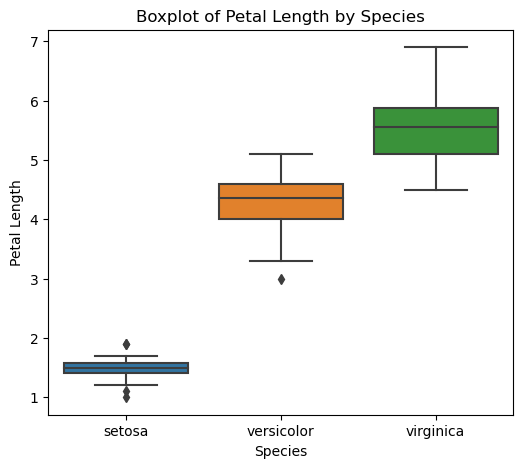

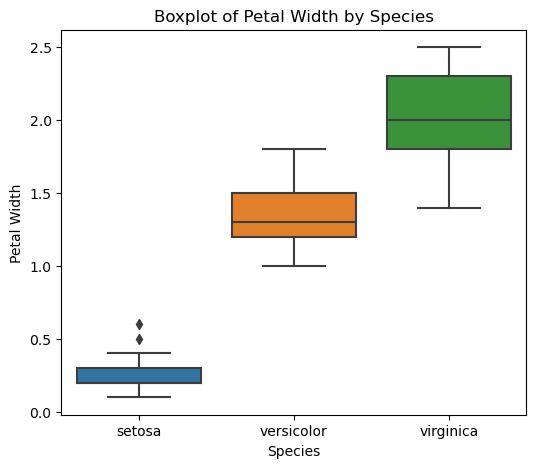

In [26]:
# (sepal length)
plt.figure(figsize=(6, 5))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Boxplot of Sepal Length by Species')
plt.show()

# (sepal width)
plt.figure(figsize=(6, 5))
sns.boxplot(x='species', y='sepal_width', data=df)
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.title('Boxplot of Sepal Width by Species')
plt.show()

# (petal length)
plt.figure(figsize=(6, 5))
sns.boxplot(x='species', y='petal_length', data=df)
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.title('Boxplot of Petal Length by Species')
plt.show()

# (petal width)
plt.figure(figsize=(6, 5))
sns.boxplot(x='species', y='petal_width', data=df)
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.title('Boxplot of Petal Width by Species')
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [27]:
# Variabel independen (fitur)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Variabel dependen (jenis bunga)
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya

In [61]:
# Membuat model Logistic Regression
logistic = LogisticRegression(random_state=0)
logistic.fit(X_train, y_train)
print(logistic)

LogisticRegression(random_state=0)


Uji model dengan dataset test

In [62]:
# Melakukan prediksi menggunakan data uji
y_pred_logress = logistic.predict(X_test)
print("Hasil prediksi pada data uji:")
print(y_pred_logress)

Hasil prediksi pada data uji:
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa']


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[8 0 0]
 [0 2 0]
 [0 0 5]]
Accuracy Score: 1.0


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [64]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
print(naive_bayes)

GaussianNB()


Uji hasil model dengan data test

In [65]:
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
print("Hasil prediksi pada data uji:")
print(y_pred_nb)

Hasil prediksi pada data uji:
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa']


Ukur akurasi dari model persamaan Naive Bayes Classifier

In [66]:
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)
accuracy_nb = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes:", accuracy_nb)

Confusion Matrix (Naive Bayes):
[[8 0 0]
 [0 2 0]
 [0 0 5]]
Akurasi Naive Bayes: 1.0


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [67]:
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(knn_euclidean)

KNeighborsClassifier(metric='euclidean')


Uji model dengan data test

In [69]:
knn_euclidean.fit(X_train, y_train)
y_pred_knn_euclidean = knn_euclidean.predict(X_test)
print("Hasil prediksi pada data uji:")
print (y_pred_knn_euclidean)

Hasil prediksi pada data uji:
['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'setosa']


Ukur akurasi dari model K-Nearest Neighbor

In [70]:
conf_matrix_knn_euclidean = confusion_matrix(y_test, y_pred_knn_euclidean)
print("Confusion Matrix (KNN - Euclidean):")
print(conf_matrix_knn_euclidean)
accuracy_knn_euclidean = accuracy_score(y_test, y_pred_knn_euclidean)
print("Akurasi KNN (Euclidean):", accuracy_knn_euclidean)

Confusion Matrix (KNN - Euclidean):
[[8 0 0]
 [0 2 0]
 [0 0 5]]
Akurasi KNN (Euclidean): 1.0


#Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Dengan data di atas, untuk dataset ini dapat di simpulkan bahwa tidak ada model klasifikasi yang lebih bagus diantara ketiganya, karena hasil dari semua model klasifikasi adalah 1.0 / 100%, jadi semuanya sama-sama bagus karena hasilnya akurat.